# Data Structuring with Python · Unicorns

Completed by [Anton Starshev](http://linkedin.com/in/starshev) on 22/05/2024

### Context

I am a member of an analytics team providing insights to an investment firm. Our goal is to identify potential unicorn companies — those valued at over one billion dollars — for investment opportunities.

### Data

The dataset provided is in the form of a csv file named `Unicorn_Companies.csv` and contains a subset of data on unicorn companies.

### Execution

Imported the relevant Python libraries and modules.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loaded the dataset into a DataFrame.

In [8]:
companies = pd.read_csv('Unicorn_Companies.csv')

Displayed the first 10 rows of the data.

In [9]:
companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


Identified the number of rows and columns.

In [134]:
companies.shape

(1074, 10)

Checked for duplicates in the data.

In [135]:
companies.duplicated().value_counts()

False    1074
Name: count, dtype: int64

Displayed the data types of the columns.

In [136]:
companies.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country/Region      object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

Converted the "Date Joined" column to datetime64 format in order to split each value into year, month and date components, allowing to gain insights later about when a company obtained unicorn status with respect to each component. Displayed the data types of the columns to confirm that the update actually took place.

In [11]:
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])
companies.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

Sorted the data to observe when the companies were found and displayed the first 10 rows of the resulting DataFrame.


In [12]:
companies.sort_values(by = 'Year Founded', ascending = True).head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
189,Otto Bock HealthCare,$4B,2017-06-24,Health,Duderstadt,Germany,Europe,1919,$0M,EQT Partners
373,Promasidor Holdings,$2B,2016-11-08,Consumer & retail,Bryanston,South Africa,Asia,1979,$556M,"IFC, Ajinomoto"
699,Five Star Business Finance,$1B,2021-03-26,Other,Chennai,India,Asia,1984,$456M,"Sequoia Capital India, Tiger Global Management..."
840,Radius Payment Solutions,$1B,2017-11-27,Fintech,Crewe,United Kingdom,Europe,1990,$200M,Inflexion Private Equity
11,Epic Games,$32B,2018-10-26,Other,Cary,United States,North America,1991,$7B,"Tencent Holdings, KKR, Smash Ventures"
377,BGL Group,$2B,2017-11-24,Fintech,Peterborough,United Kingdom,Europe,1992,$696M,CPP Investment Board
1043,Thirty Madison,$1B,2021-06-02,Health,New York,United States,North America,1993,$210M,"Northzone Ventures, Maveron, Johnson & Johnson..."
129,Howden Group Holdings,$5B,2020-09-29,Other,London,United Kingdom,Europe,1994,$187M,"General Atlantic, 3i Group, Huagai Capital"
118,Vice Media,$6B,2011-04-02,Internet software & services,Brooklyn,United States,North America,1994,$1B,"Technology Crossover Ventures, A&E Television ..."
360,Carzone,$2B,2019-03-01,E-commerce & direct-to-consumer,Jiangsu,China,Asia,1995,$946M,"Alibaba Group,Co-Stone Venture Capital, Buhuo ..."


**EDA observations:** 
- There are 1074 rows and 10 columns in the dataset with no duplicates detected
- According to this dataset, there are 1074 unicorn companies, as of March 2022
- This dataset shows 10 aspects of each company
- The data type of the 'Year Founded' column was converted from int64 to datetime64 for convenience, the rest of the columns have the dtype 'object'
- Data was sorted by 'Year Founded' in ascending order

### Task 1 · How many companies were founded each year?

Displayed each unique year that occurs in the dataset along with the number of companies that were founded in each unique year.

In [13]:
years_grouped = companies.groupby('Year Founded').size().sort_values(ascending = False)

years_grouped

Year Founded
2015    155
2016    110
2014    109
2012     95
2013     87
2011     82
2017     74
2018     61
2019     45
2010     40
2009     34
2008     27
2020     25
2007     24
2006     15
2005     14
2000     11
2021     11
2001      9
2004      8
2003      8
1999      8
1998      5
2002      4
1995      2
1994      2
1979      1
1997      1
1996      1
1993      1
1992      1
1991      1
1990      1
1984      1
1919      1
dtype: int64

Ploted a histogram of the "Year Founded" feature.

Text(0.5, 1.0, 'Year Founded histogram')

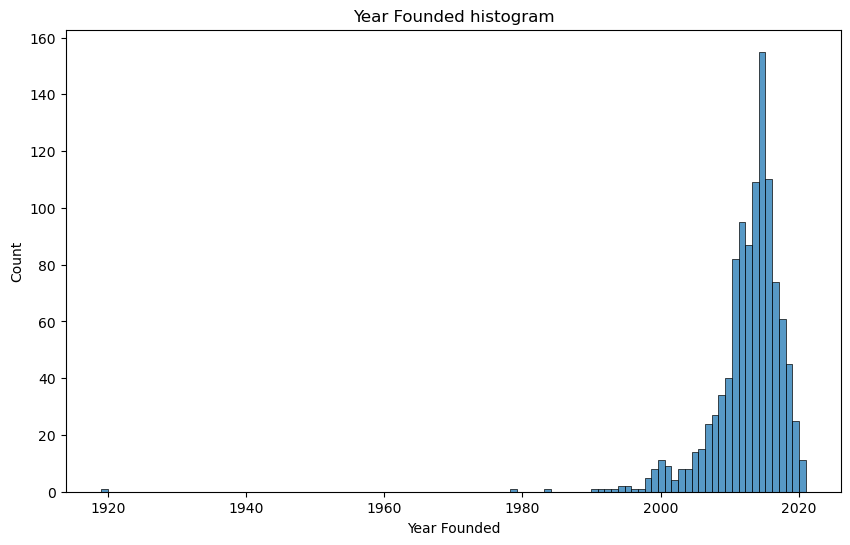

In [146]:
plt.figure(figsize = (10, 6))
sns.histplot(data = companies, x = 'Year Founded')
plt.title('Year Founded histogram')

**Observations:**
- Year 2015 has the highest count of companies founded
- The graphical representation of the frequency distribution shows a dramatic increase in the number of companies being founded between the years 2010 and 2020

### Task 2 · How many years taken to become a unicorn with respect to the month when joined the list?

Obtained the names of the months when companies gained unicorn status and used the result to create a "Month Joined" column.

In [14]:
companies.insert(loc = 3, column = 'Month Joined', 
                 value = companies['Date Joined'].dt.month_name())

companies.head()

,Company,Valuation,Date Joined,Month Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,April,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,December,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,July,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,January,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,December,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


Determined how many years it took for companies to reach unicorn status, and used the result to create a "Years To Join" column.

In [15]:
companies.insert(loc = 4, column = 'Years To Join', value = 
                 companies['Date Joined'].dt.year - companies['Year Founded'])

companies.head()

,Company,Valuation,Date Joined,Month Joined,Years To Join,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,April,5,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,December,10,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,July,10,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,January,4,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,December,6,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


Defined a list that contains months in chronological order, to use for future visualization.

In [16]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
month_order

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

Created a box plot to visualize the distribution of how long it took companies to become unicorns, with respect to the month they joined. 

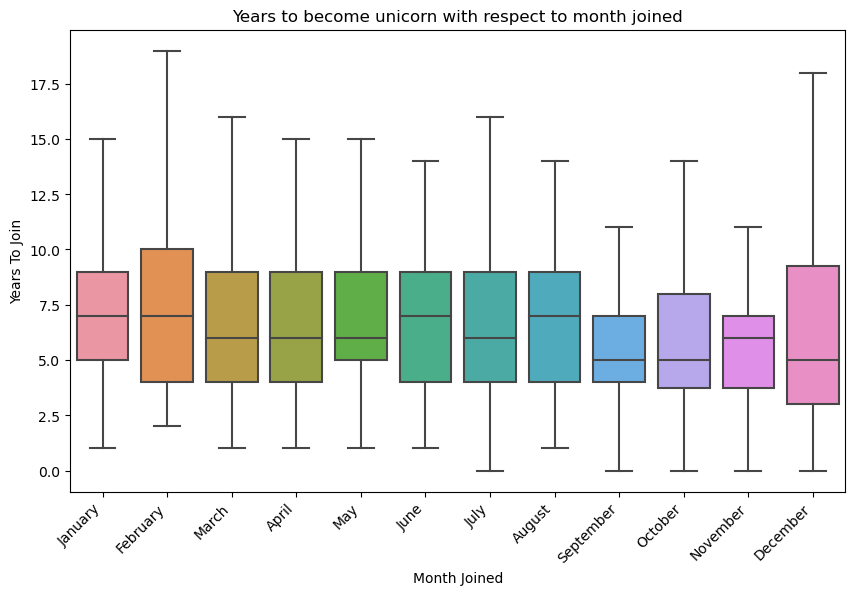

In [151]:
plt.figure(figsize = (10,6))
sns.boxplot(x = companies['Month Joined'], y = companies['Years To Join'], 
            order = month_order, showfliers = False)

plt.title('Years to become unicorn with respect to month joined')
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()

**Observations:** 
- In the preceding box plot, the median value for "Years To Join" is slightly different for each month, however always in the range from 5 to 7,5 years
- The median "Years To Join" is lower for the months of September, October and December, which could possibly indicate that companies that reached unicorn status in early fall (or right before New Year) took less time to reach 1 billion dollar valuation
- Overall the distribution of companies is relatively close (consistent) for each month

### Task 3 · Visualize the time it took companies to reach unicorn status

Created a bar plot to visualize the average number of years it took companies to reach unicorn status with respect to when they were founded.

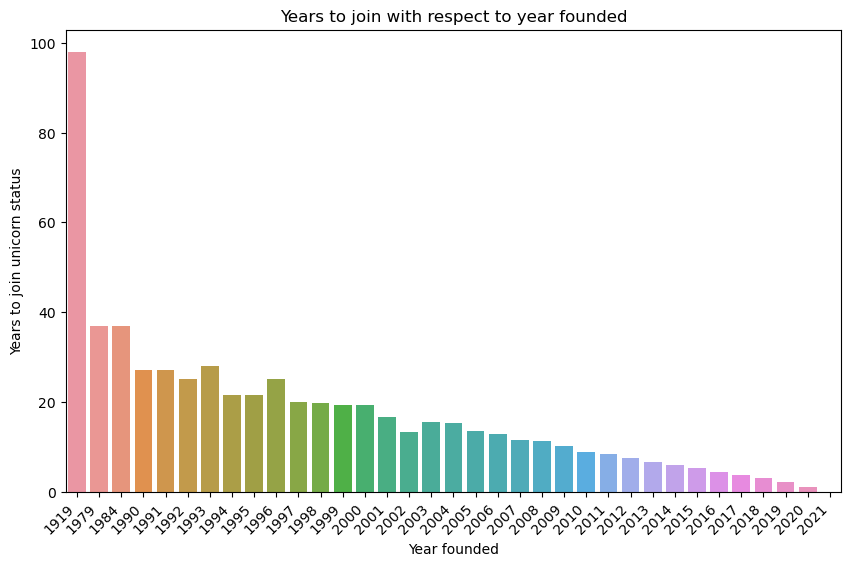

In [156]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Year Founded', y = 'Years To Join', data = companies, 
            errorbar=('ci', False))

plt.title('Years to join with respect to year founded')
plt.xlabel('Year founded')
plt.ylabel('Years to join unicorn status')
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()

**Observations:** 

It appears to be a strong trend wherein companies that were founded later take less and less time to reach unicorn status.

### Task 4 · Zoom into the year 2020 and define the companies joining trend over time

To gain more insight on the year 2020, filtered the dataset by that year and saved the resulting subset into a new variable. 

In [17]:
twenty_twenty = companies[companies['Date Joined'].dt.year == 2020]

twenty_twenty.head()

,Company,Valuation,Date Joined,Month Joined,Years To Join,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
22,Genki Forest,$15B,2020-03-01,March,4,Consumer & retail,Beijing,China,Asia,2016,$721M,"Sequoia Capital China, Longfor Capitalm, Gaoro..."
23,goPuff,$15B,2020-10-08,October,7,E-commerce & direct-to-consumer,Philadelphia,United States,North America,2013,$3B,"Accel, Softbank Group, Anthos Capital"
38,Xingsheng Selected,$12B,2020-07-22,July,11,E-commerce & direct-to-consumer,Changsha,China,Asia,2009,$5B,"KKR, Tencent Holdings, Sequoia Capital China"
54,Figma,$10B,2020-04-30,April,8,Internet software & services,San Francisco,United States,North America,2012,$333M,"Index Ventures, Greylock Partners, Kleiner Per..."
57,Notion Labs,$10B,2020-04-01,April,4,Internet software & services,San Francisco,United States,North America,2016,$343M,"Index Ventures, Draft Ventures, Felicis Ventures"


Implemented the structuring approach (based on weekly intervals) to observe trends over time in the companies that became unicorns for the year 2020. 

For that purpose, inserted a column that contains the time interval - "Week Joined" - that each data point belongs to, then grouped that time interval and aggregated by counting companies that joined per each interval of year 2020, assigning the result to a new variable.

In [18]:
twenty_twenty.insert(loc = 4, column = 'Week Joined', 
                     value = twenty_twenty['Date Joined'].dt.strftime('%Y-W%U'))

weeks2020 = twenty_twenty.groupby('Week Joined').size().reset_index()
weeks2020.columns = ['Week Joined', 'Number of Unicorns']

weeks2020.head(10)

,Week Joined,Number of Unicorns
0,2020-W00,1
1,2020-W01,2
2,2020-W03,3
3,2020-W04,4
4,2020-W05,1
5,2020-W06,2
6,2020-W09,2
7,2020-W10,1
8,2020-W11,1
9,2020-W13,2


Using the resulted subset of companies joined in the year 2020, grouped by the time interval of one week, created a bar plot to visualize the number of companies that joined per every week of 2020.

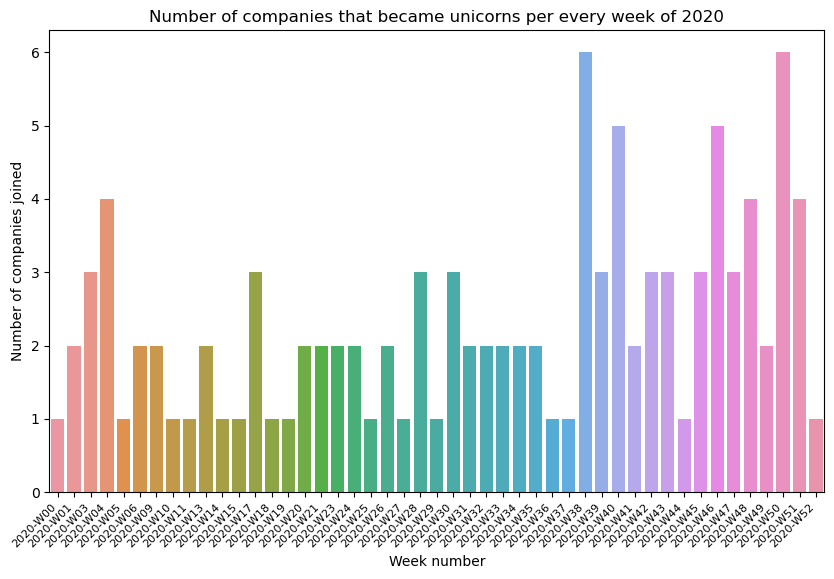

In [157]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Week Joined', y = 'Number of Unicorns', data = weeks2020, 
            errorbar=('ci', False))

plt.xlabel('Week number')
plt.ylabel('Number of companies joined')
plt.title('Number of companies that became unicorns per every week of 2020')
plt.xticks(rotation = 45, horizontalalignment = 'right', fontsize = 8)
plt.show()

**Observations:**

The number of newly appeared billion-dollar companies is approximately the same during the first 3 quarters of the year, and in the fourth quarter there is a sharp increase, which interestingly complements the global (annual) trend discussed in task 2, which showed that companies that joined in the last months of the year spent less years on average to reach the unicorn status.

### Task 5 · Compare the average valuation of companies that became unicorns in the years 2020 vs 2021

Identified the quarter as an interval of interest and created a subset that consists of companies that joined in that years 2020 and 2021.

In [19]:
years_2020_and_2021 = companies[(companies['Date Joined'].dt.year == 2020)
| (companies['Date Joined'].dt.year == 2021)].copy()

Added a column that contains the time interval (quarter) that each data point belongs to. In addition, transform the 'Valuation' column to represent its data in numerical way suitable for visualization.

In [20]:
years_2020_and_2021.insert(loc = 3, column = 'Quarter Joined', 
value = years_2020_and_2021['Date Joined'].dt.to_period('Q').dt.strftime('%Y-Q%q'))

val_column = years_2020_and_2021['Valuation'].str.strip("$B").astype(float)

years_2020_and_2021.drop(columns = 'Valuation', inplace = True)
years_2020_and_2021.insert(loc = 1, column = 'Valuation', value = val_column)

years_2020_and_2021.head()

,Company,Valuation,Date Joined,Quarter Joined,Month Joined,Years To Join,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
12,FTX,32.0,2021-07-20,2021-Q3,July,3,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank"
16,J&T Express,20.0,2021-04-07,2021-Q2,April,6,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,$5B,"Hillhouse Capital Management, Boyu Capital, Se..."
22,Genki Forest,15.0,2020-03-01,2020-Q1,March,4,Consumer & retail,Beijing,China,Asia,2016,$721M,"Sequoia Capital China, Longfor Capitalm, Gaoro..."
23,goPuff,15.0,2020-10-08,2020-Q4,October,7,E-commerce & direct-to-consumer,Philadelphia,United States,North America,2013,$3B,"Accel, Softbank Group, Anthos Capital"
24,Blockchain.com,14.0,2021-02-17,2021-Q1,February,10,Fintech,London,United Kingdom,Europe,2011,$490M,"Lightspeed Venture Partners, Google Ventures, ..."


Filtered the data by qurter joined and aggregated by average valuation of companies joined in every quarter.

In [21]:
companies_by_quarter_2020_2021 = years_2020_and_2021.groupby('Quarter Joined')[['Valuation']].mean().reset_index()
companies_by_quarter_2020_2021.rename(columns={'Valuation' : 'AVG Valuation'}, 
                                      inplace = True)

companies_by_quarter_2020_2021

,Quarter Joined,AVG Valuation
0,2020-Q1,3.444444
1,2020-Q2,3.777778
2,2020-Q3,3.896552
3,2020-Q4,3.697674
4,2021-Q1,2.750000
5,2021-Q2,2.340278
6,2021-Q3,2.291045
7,2021-Q4,1.850746


Extracted the year component and the time interval (quarter), saving them in two new columns added into the subset.

In [171]:
companies_by_quarter_2020_2021['Q'] = companies_by_quarter_2020_2021['Quarter Joined'].str.replace('2020-','')
companies_by_quarter_2020_2021['Q'] = companies_by_quarter_2020_2021['Q'].str.replace('2021-','')

companies_by_quarter_2020_2021['Year'] = companies_by_quarter_2020_2021['Quarter Joined'].str.replace('-Q1','')
companies_by_quarter_2020_2021['Year'] = companies_by_quarter_2020_2021['Year'].str.replace('-Q2','')
companies_by_quarter_2020_2021['Year'] = companies_by_quarter_2020_2021['Year'].str.replace('-Q3','')
companies_by_quarter_2020_2021['Year'] = companies_by_quarter_2020_2021['Year'].str.replace('-Q4','')

companies_by_quarter_2020_2021

,Quarter Joined,AVG Valuation,Q,Year
0,2020-Q1,3.444444,Q1,2020
1,2020-Q2,3.777778,Q2,2020
2,2020-Q3,3.896552,Q3,2020
3,2020-Q4,3.697674,Q4,2020
4,2021-Q1,2.750000,Q1,2021
5,2021-Q2,2.340278,Q2,2021
6,2021-Q3,2.291045,Q3,2021
7,2021-Q4,1.850746,Q4,2021


Using the resulted subset, created a grouped bar plot to visualize the average valuation over the quarters, with two bars for each time interval - one for year 2020 and another for year 2021.

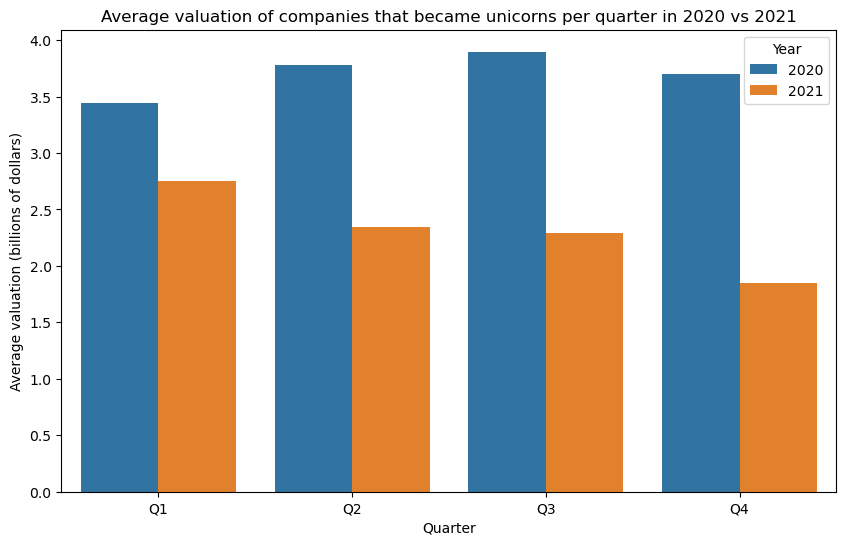

In [174]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Q', y = 'AVG Valuation', hue = 'Year', data = companies_by_quarter_2020_2021,
            errorbar=('ci', False))

plt.xlabel("Quarter")
plt.ylabel("Average valuation (billions of dollars)")
plt.title("Average valuation of companies that became unicorns per quarter in 2020 vs 2021")
plt.show()

**Observations:**

- In each quarter, the average valuation of companies that joined unicorn status was higher in 2020 than in 2021
- In 2020, Q3 was the quarter with the highest average valuation of companies that reached unicorn status, and in general there was an apparent trend of increase from Q1 to Q2 and from Q2 to Q3 within the year 2020
- In 2021, Q1 was the quarter with the highest average valuation of companies that reached unicorn status, and there was an apparent trend of decrease across all the quarters of 2021

### Findings and conclusions

- According to data analysis that was conducted on a dataset of 1074 unicorns, companies that joined in the months of September and October tended to take less time to become unicorns
- 2015 is the year when the most number of unicorn companies were founded
- The in-depth exploration within the year 2020 showed that the number of new billion-dollar companies remains roughly the same during the first three quarters of the year and then sharply increases in the fourth quarter, which interestingly resonates with the global trend (discussed in task 2), according to which the companies joined in the last months of each year spent less years on average to obtain the unicorn status, whereinto this seasonal spike might be due to several factors, such as end-of-year financial reporting or increased investment activities
- Many of the unicorn companies that were founded in 2021 - were founded in the United States and belong to "Fintech", "E-commerce & direct-to-consumer" and "Internet software & services" industries
- The average valuation of companies that joined in 2021 is highest in the first quarter of the year, and the average valuation of companies that joined in 2020 is highest in the third quarter of the year
- The data can be analyzed further to gather more insights that are specific to the interests of the investing firm and the stakeholders

### Acknowledgment ###

This is a lab based on workplace scenario proposed within the syllabus of *Google Advanced Data Analytics Professional Certificate* on Coursera.

I would like to express gratitude to Google and Coursera for supporting the educational process and providing the opportunity to refine and showcase skills acquired during the courses by completing real-life scenario portfolio projects, such as this.

### Data References ###

Bhat, M.A. (2022, March). [*Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies).